In [1]:
!git clone https://github.com/eduardobatista/ActVibModules.git

%pip install matplotlib
%pip install pandas feather-format
%pip install numpy
%pip install scipy
%pip install tensorflow
%pip install keras
%pip install pyarrow

import os
import gdown
import numpy as np
import matplotlib.pyplot as plt

from scipy import signal
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Sequential
from ActVibModules.ActVibSystem import ActVibData 

fatal: destination path 'ActVibModules' already exists and is not an empty directory.


Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.



# Funções úteis e DATASET

In [3]:
def baixar_dados(link: str, *, output_dir: str|os.PathLike = 'Dados') -> bool:
    """
    Baixa um arquivo do Google Drive para a pasta (out) se esta estiver vazia.
    
    Parameters
    ----------
    link : str
        Link do Google Drive onde o arquivo se encontra.
    output_dir : str | os.PathLike, optional
        Local onde os downloads seram armazenados. Por padrão, cria uma pasta chamada 'Dados'.

    Returns
    -------
    bool
        Indica se o download ocorreu (True = fez download, False = não fez download)
    """
    
    from gdown import download
    
    if not os.path.exists(output_dir):
        os.mkdir(output_dir)
    
    if os.listdir(output_dir) == []:
        raiz = os.getcwd()
        os.chdir(output_dir)
        
        download(link, fuzzy=True)
        
        os.chdir(raiz)
        
        return True

    return False
    


def unzip_arquivos_da_pasta(path: str, *, output_dir: str = None) -> None:
    """
    Descompacta todos os arquivos zip de uma pasta.

    Parameters
    ----------
    path : str
        Caminho da pasta contendo os arquivos.
    output_dir : str, optional
        Caminho da pasta em que os arquivos descompactados serão salvo. Por padrão, salva os arquivos na mesma pasta dos zips.
    """
    
    from zipfile import ZipFile
    
    zips = [zip for zip in os.listdir(path) if zip.endswith('.zip')]
    out_path = path if output_dir is None else output_dir

    for i in zips:
        with ZipFile(path + i) as zip:
            zip.extractall(out_path)

# Importando MedicaoDedoJoao

In [4]:
os.getcwd()

'c:\\Users\\jpsfb\\OneDrive\\Área de Trabalho\\LINSE\\Códigos'

In [5]:
# Lista de tuplas contendo o ID do arquivo e o URL de cada arquivo
arquivos_para_baixar = [
    ('MedicaoDEDOjoao', 'https://drive.google.com/file/d/1waQTn6e9-QB5OPWqSTHl4HRZRisL7-rv/view?usp=drive_link'),
    ('MedicaoMETAL2joao', 'https://drive.google.com/file/d/19XDZhFSeum3GM6W2bq2fSOLUs0C-DO5d/view?usp=drive_link'),
    ('MedicaoMetalJOAO', 'https://drive.google.com/file/d/1B-3I_9Dd6cGZ2ccoiEbdP8B-pa4gZZKy/view?usp=drive_link'),
    ('MedicoesDedo2joao', 'https://drive.google.com/file/d/1HV1VR9SBKw7eI1yAJ33VNADVXSZVe_mV/view?usp=drive_link')
]

# Itera sobre cada tupla e baixa o arquivo correspondente
for arquivo_id, arquivo_url in arquivos_para_baixar:
    # Baixando o arquivo
    gdown.download(arquivo_url, quiet=False, fuzzy=True)

Downloading...
From: https://drive.google.com/uc?id=1waQTn6e9-QB5OPWqSTHl4HRZRisL7-rv
To: c:\Users\jpsfb\OneDrive\Área de Trabalho\LINSE\Códigos\MedicaoDEDOjoao.feather
100%|██████████| 6.31M/6.31M [00:00<00:00, 11.7MB/s]
Downloading...
From: https://drive.google.com/uc?id=19XDZhFSeum3GM6W2bq2fSOLUs0C-DO5d
To: c:\Users\jpsfb\OneDrive\Área de Trabalho\LINSE\Códigos\MedicaoMETAL2joao.feather
100%|██████████| 6.20M/6.20M [00:00<00:00, 11.9MB/s]
Downloading...
From: https://drive.google.com/uc?id=1B-3I_9Dd6cGZ2ccoiEbdP8B-pa4gZZKy
To: c:\Users\jpsfb\OneDrive\Área de Trabalho\LINSE\Códigos\MedicaoMetalJOAO.feather
100%|██████████| 6.49M/6.49M [00:00<00:00, 13.8MB/s]
Downloading...
From: https://drive.google.com/uc?id=1HV1VR9SBKw7eI1yAJ33VNADVXSZVe_mV
To: c:\Users\jpsfb\OneDrive\Área de Trabalho\LINSE\Códigos\MedicoesDedo2joao.feather
100%|██████████| 6.26M/6.26M [00:00<00:00, 12.5MB/s]


In [35]:
os.chdir(r'C:\Users\jpsfb\OneDrive\Área de Trabalho\LINSE\Dados')

In [39]:
# Verifique o diretório atual
print("Diretório atual:", os.getcwd())

# Liste os arquivos no diretório atual
print("Arquivos no diretório:", os.listdir())

Diretório atual: C:\Users\jpsfb\OneDrive\Área de Trabalho\LINSE\Dados
Arquivos no diretório: ['ChaveGrande.feather', 'ChaveMedia.feather', 'ChavePequena.feather', 'Dados_Gabriel.7z', 'Dados_Impacto_Amortecido.csv', 'Dados_Impacto_Amortecido.feather', 'Dados_Impacto_Metalico.csv', 'Dados_Impacto_Metalico.feather', 'Dados_Joao.zip', 'DEDOnovaVersao-versao2(VIGA 2).feather', 'Impacto_Chave_Grande-22.feather', 'Impacto_Chave_Media-13.feather', 'Impacto_Chave_Pequena-9.feather', 'MedicaoDEDOjoao.feather', 'MedicaoMETAL2joao.feather', 'MedicaoMetalJOAO.feather', 'MedicoesDedo2joao.feather', 'METALnovaVersao-versAO2 (VIGA 2).feather', 'teste(metal)Joao.feather', 'teste1Joao.feather']


# AGORA FAZENDO PARA KERAS/TENSORFLOW


In [40]:
dadosDedo = ActVibData("MedicaoDEDOjoao.feather")
dadosDedo.head()
acc1d = dadosDedo.imu1accz.values - dadosDedo.imu1accz.mean()  
acc2d = dadosDedo.imu2accz.values - dadosDedo.imu2accz.mean()  
time = dadosDedo.time.values
display(dadosDedo.getLogs())

TSampl = dadosDedo.time.values[1] - dadosDedo.time.values[0]
display(1/TSampl)

[[0.0, 'Started'],
 [0.004808, 'IMU1|LSM6DS3|0x6B|I2C-1|±4g (±39,2m/s²)|±125º/s|Auto'],
 [0.009616, 'IMU2|LSM6DS3|0x6B|I2C-2|±4g (±39,2m/s²)|±125º/s|Auto'],
 [0.014424, 'IMU3|Disabled'],
 [0.019232, 'ADC|ADS1015|0|0|0|0|±0.256 V|1600 SPS'],
 [0.02404, 'Gen1|Disabled'],
 [0.028848, 'Gen2|Disabled'],
 [0.033656, 'Gen3|Disabled'],
 [0.038464, 'Gen4|Disabled'],
 [0.043272, 'Ctrl|Disabled'],
 [599.00468, 'Stopped']]

207.9866888519135

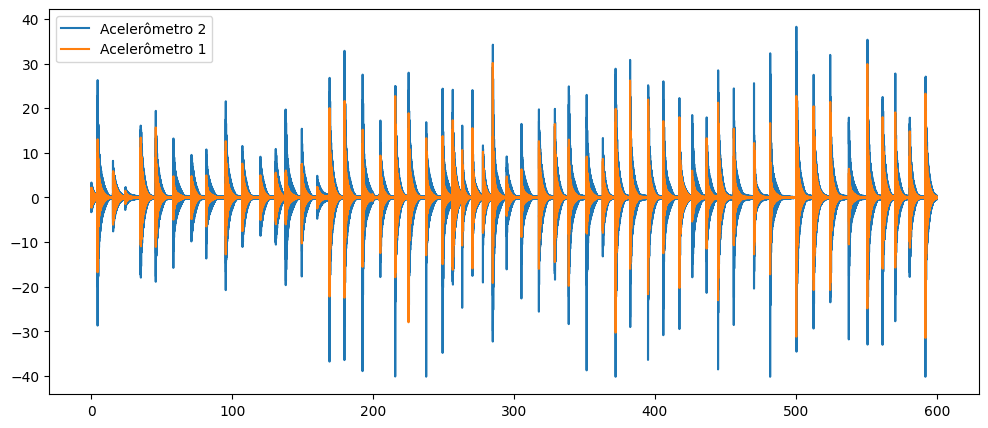

In [41]:
plt.plot(time,acc2d,label="Acelerômetro 2")
plt.plot(time,acc1d,label="Acelerômetro 1")

plt.legend()

#plt.xlim(2,10) -> para dar zoom e analisar intervalo da amostra

plt.gcf().set_size_inches(12,5) #para falar intervalo em polegadas que deseja estudar amostra
plt.show()

(array([   940,   3219,   7295,   9520,  12134,  14801,  16992,  19850,
        22302,  24968,  27222,  28726,  31092,  35170,  37391,  40060,
        42680,  44867,  46845,  49450,  51876,  53350,  54754,  56268,
        57816,  59264,  61335,  63503,  66078,  68423,  70497,  73129,
        75513,  77407,  79529,  82200,  84441,  86818,  88702,  90829,
        92531,  94840,  97846, 100207, 104069, 106620, 109081, 111831,
       114556, 116808, 118676, 120809, 123127], dtype=int64), {'peak_heights': array([13.04524462,  5.84947153, 13.42472558, 15.69203455,  4.75532137,
        4.73736486,  4.9480546 , 12.61309122,  7.60083004,  4.97558792,
        5.55737893,  6.05656997,  7.51344168, 20.03032796, 21.62606337,
       15.19404061,  9.39648129, 22.72979033, 18.88350537, 13.29065029,
       13.7455486 , 17.31889458, 10.63548065, 15.54598825, 10.23325477,
       30.15061838,  4.71940835,  6.31873506, 12.62386513, 16.46895299,
       12.97222147,  9.17501764,  8.65427877, 19.87470485, 26.

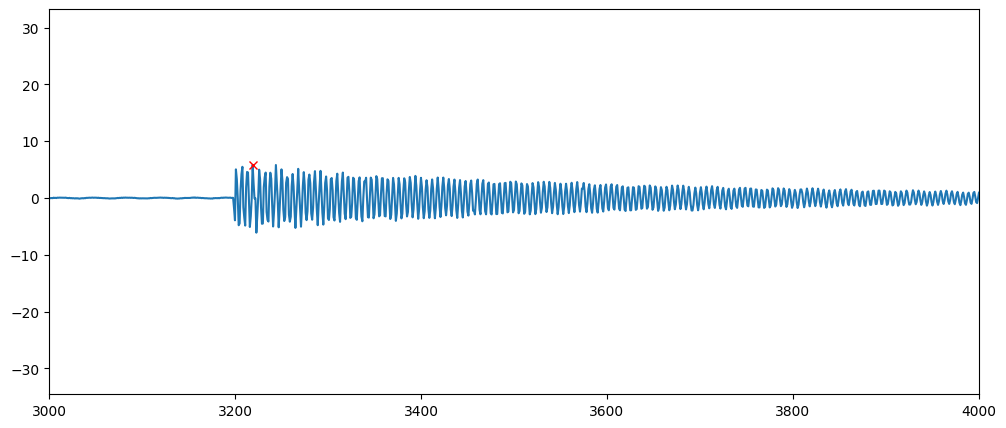

In [42]:
aux1 = signal.find_peaks(acc1d,height=3,distance=1300)#para achar picos
print(aux1)
plt.plot(acc1d)
plt.plot(aux1[0],aux1[1]['peak_heights'], 'xr')
#plt.gcf().set_size_inches(15,2)
plt.xlim(3000,4000)
plt.gcf().set_size_inches(12,5) #para falar intervalo em polegadas que deseja estudar amostra
plt.show()

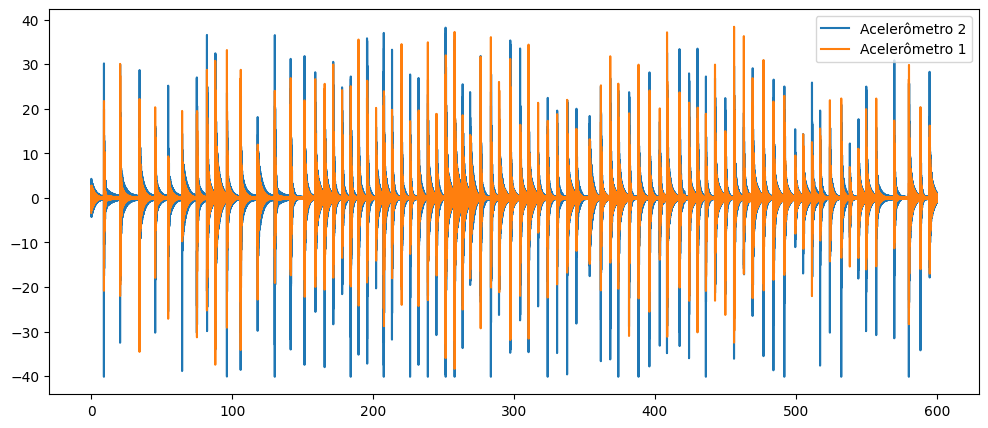

(array([  1882,   4262,   7134,   9437,  11361,  13411,  15607,  17074,
        18296,  20026,  22072,  24574,  27092,  29436,  31475,  33060,
        34457,  35713,  37021,  38297,  39446,  40737,  42040,  43202,
        44394,  45801,  47063,  48327,  49685,  50950,  52331,  53629,
        54818,  55936,  57467,  58987,  60186,  61840,  63328,  64547,
        65959,  67377,  68762,  70244,  71610,  73572,  75229,  76605,
        77794,  79388,  80782,  82410,  83916,  84987,  86833,  88249,
        89510,  90721,  92068,  93593,  94883,  96324,  97621,  99227,
       100695, 102297, 103930, 105079, 106381, 107576, 109027, 110702,
       111968, 113221, 114370, 115868, 118529, 120701, 122394, 123761],
      dtype=int64), {'peak_heights': array([21.75172266, 30.07396763, 22.19704417, 20.33674948,  9.32222474,
       19.51434121, 19.5035673 , 28.7380031 , 30.77427161, 33.18283848,
       28.74757991, 11.95345236, 24.02860844, 26.89805913, 21.88460085,
       26.65385056, 25.60040183, 29

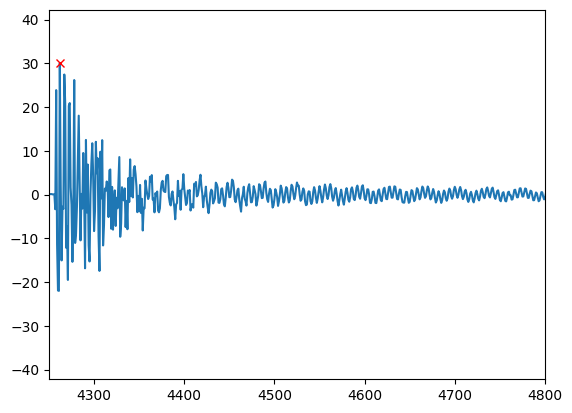

In [43]:
dadosMetal = ActVibData("MedicaoMetalJOAO.feather")
dadosMetal.head()
acc1m = dadosMetal.imu1accz.values - dadosMetal.imu1accz.mean()  #Acelerômetro 1
acc2m = dadosMetal.imu2accz.values - dadosMetal.imu2accz.mean() #Acelerômetro 2
time = dadosMetal.time.values

plt.plot(time,acc2m,label="Acelerômetro 2")
plt.plot(time,acc1m,label="Acelerômetro 1")

plt.legend()

#plt.xlim(2,10) -> para dar zoom e analisar intervalo da amostra

plt.gcf().set_size_inches(12,5) #para falar intervalo em polegadas que deseja estudar amostra
plt.show()

aux2 = signal.find_peaks(acc1m,height=3,distance=1000) #para achar picos
print(aux2)
plt.plot(acc1m)
plt.plot(aux2[0],aux2[1]['peak_heights'], 'xr')
#plt.gcf().set_size_inches(15,2)
plt.xlim(4250,4800)
plt.show()

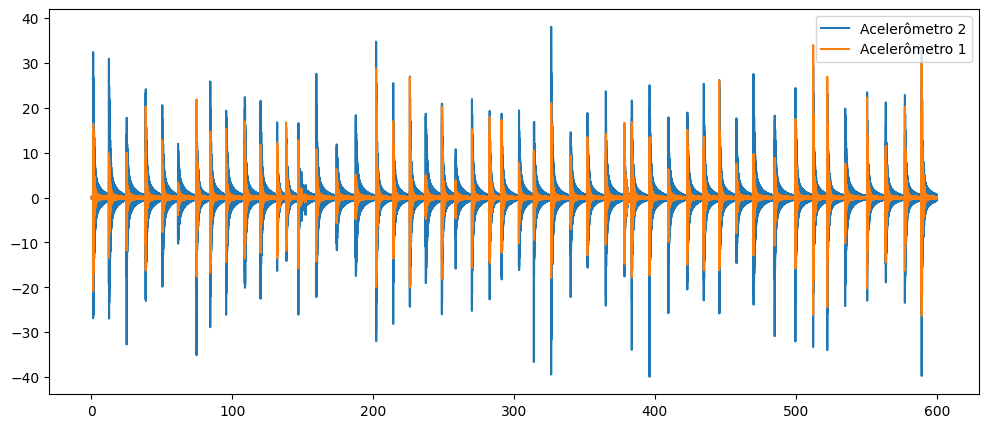

(array([   284,   2611,   5239,   8050,  10489,  12813,  15552,  17574,
        19920,  22672,  24995,  27443,  30583,  33225,  36232,  39045,
        42045,  44576,  47040,  49373,  51757,  53797,  56195,  58812,
        60575,  63139,  65373,  67889,  70775,  73237,  75956,  79794,
        82413,  85201,  87992,  90415,  92698,  95232,  97752, 100887,
       103947, 106562, 108677, 111287, 114520, 117275, 120102, 122581],
      dtype=int64), {'peak_heights': array([32.45874107, 30.99109546, 17.79425591, 24.17600043, 20.62420227,
       12.00866759, 21.01086584, 25.89024882, 19.3804145 , 22.41985351,
       21.58308003, 16.79467671, 16.61152029, 27.60449721, 11.8769865 ,
       18.38562372, 34.77991958, 25.52273886, 26.99876419, 18.71722065,
       20.9569963 , 10.79241315, 21.9721378 , 19.32534787, 18.70644674,
       19.45702896, 16.88445927, 38.09708598, 14.60039089, 18.87164665,
       23.70793401, 21.67166549, 25.06424925, 17.90558628, 18.96142921,
       25.38507227, 26.20987474

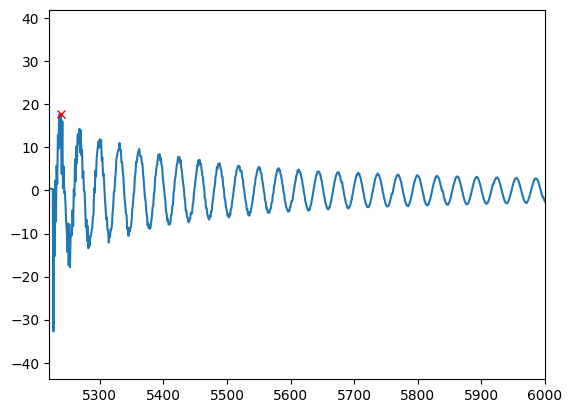

In [44]:
dadosDedo2 = ActVibData("MedicoesDedo2joao.feather")
dadosDedo2.head()
accD1 = dadosDedo2.imu1accz.values - dadosDedo2.imu1accz.mean()  #Acelerômetro 1
accD2 = dadosDedo2.imu2accz.values - dadosDedo2.imu2accz.mean() #Acelerômetro 2
time = dadosDedo2.time.values

plt.plot(time,accD2,label="Acelerômetro 2")
plt.plot(time,accD1,label="Acelerômetro 1")

plt.legend()

#plt.xlim(2,10) -> para dar zoom e analisar intervalo da amostra

plt.gcf().set_size_inches(12,5) #para falar intervalo em polegadas que deseja estudar amostra
plt.show()

aux21 = signal.find_peaks(accD2,height=10,distance=1600) #para achar picos
print(aux21)
plt.plot(accD2)
plt.plot(aux21[0],aux21[1]['peak_heights'], 'xr')
#plt.gcf().set_size_inches(15,2)
plt.xlim(5220,6000)
plt.show()

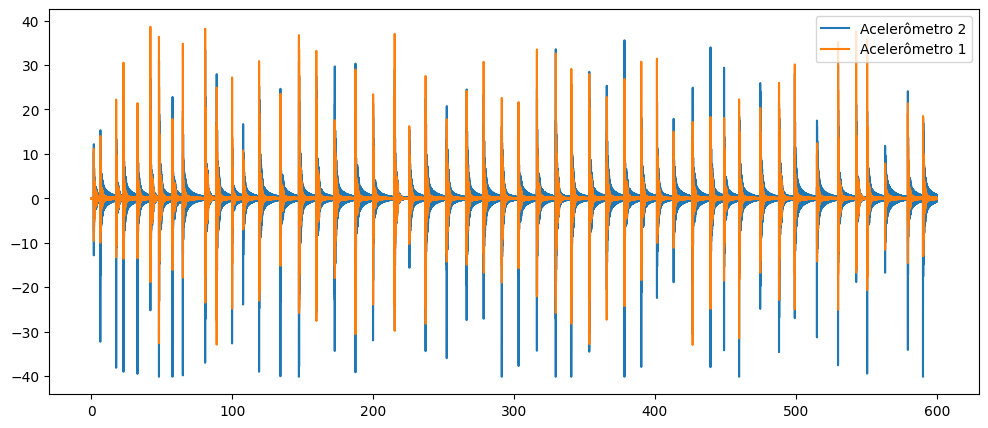

(array([  1352,   4754,   6830,  10004,  12003,  16817,  18519,  20795,
        22420,  24781,  27924,  30662,  33218,  35950,  39002,  41598,
        44797,  46950,  49358,  52480,  55418,  57923,  60597,  63087,
        65788,  68567,  70863,  73513,  76095,  78707,  81193,  83513,
        85963,  88777,  91407,  93406,  95637,  98739, 101517, 103855,
       107123, 110231, 112910, 114533, 117175, 120535, 122781],
      dtype=int64), {'peak_heights': array([15.32499609, 21.85996953, 19.12579123, 30.97948365, 22.80687628,
       33.45508817, 27.94363594, 12.14669339, 16.69088814, 25.18910693,
       24.64322896, 30.93159962, 27.52225645, 29.68302345, 30.31628979,
       21.13931483, 29.0329977 , 15.51294092, 22.38908809, 20.75145416,
       24.50556236, 23.28332241, 15.86728277, 21.51520449, 24.68632459,
       33.54726493, 20.08347189, 28.47036031, 25.32797063, 35.55719722,
       18.25190762, 21.6768131 , 17.88439767, 24.89701433, 33.96744732,
       29.39332505, 18.39675682, 25.949

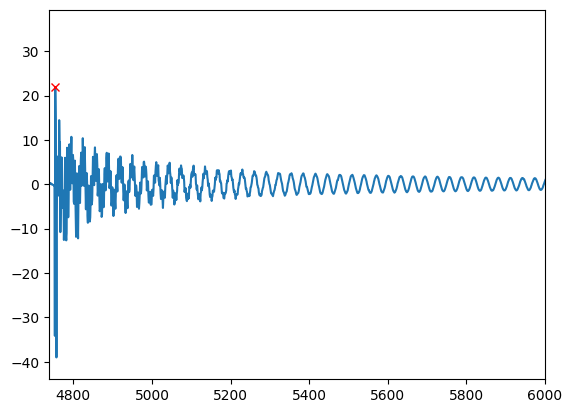

In [45]:
dadosMetal2 = ActVibData("MedicaoMETAL2joao.feather")
dadosMetal2.head()
accD21 = dadosMetal2.imu1accz.values - dadosMetal2.imu1accz.mean()  #Acelerômetro 1
accD22 = dadosMetal2.imu2accz.values - dadosMetal2.imu2accz.mean() #Acelerômetro 2
time = dadosMetal2.time.values

plt.plot(time,accD22,label="Acelerômetro 2")
plt.plot(time,accD21,label="Acelerômetro 1")

plt.legend()

#plt.xlim(2,10) -> para dar zoom e analisar intervalo da amostra

plt.gcf().set_size_inches(12,5) #para falar intervalo em polegadas que deseja estudar amostra
plt.show()

aux22 = signal.find_peaks(accD22,height=10,distance=1600) #para achar picos
print(aux22)
plt.plot(accD22)
plt.plot(aux22[0],aux22[1]['peak_heights'], 'xr')
#plt.gcf().set_size_inches(15,2)
plt.xlim(4738,6000)
plt.show()

In [46]:
TamJanela = int(3.6*208)

def criar_amostras_e_rotulos(dados, nome_arquivo):
    acc1 = dados.imu1accz.values - dados.imu1accz.mean()
    picos, _ = signal.find_peaks(acc1, height=3, distance=1500)  # Acessar os picos corretamente
# função signal.find_peaks retorna duas tuplas, onde a primeira tupla contém os picos encontrados e a segunda tupla contém informações adicionais sobre esses picos. O _ é uma convenção em muitas linguagens de programação, incluindo Python, que é usada para indicar que você deseja descartar um valor que não será usado.
# Nesse caso específico, a função signal.find_peaks retorna informações sobre os picos encontrados, como suas alturas e outros dados, que são armazenados em uma tupla. O primeiro elemento da tupla contém os picos, que são a parte relevante para o seu código. A expressão _, é usada para descartar a segunda parte da tupla, que não é usada no restante do código.
# em resumo, a , _ está descartando as informações adicionais retornadas pela função signal.find_peaks, mantendo apenas os picos na variável picos.
    amostras = []
    rotulos = []

    for i in range(len(picos) - 1):
        inicio = picos[i]
        fim = picos[i] + TamJanela
        amostra = acc1[inicio:fim]
        amostra = amostra - amostra.mean() 
        amostra = amostra / amostra.max()
        amostras.append(amostra)
        rotulos.append(nome_arquivo) #coluna de classificação em DEDO ou METAL

    return amostras, rotulos


amostras_dedo, rotulos_dedo = criar_amostras_e_rotulos(dadosDedo, "MedicaoDEDOjoao.feather")
amostras_metal, rotulos_metal = criar_amostras_e_rotulos(dadosMetal, "MedicaoMetalJOAO.feather")
amostras_dedo2, rotulos_dedo2 = criar_amostras_e_rotulos(dadosDedo2, "MedicoesDedo2joao.feather")
amostras_metal2, rotulos_metal2 = criar_amostras_e_rotulos(dadosMetal2, "MedicaoMETAL2joao.feather")
print(amostras_dedo[0].shape)
print(amostras_dedo[0])

(748,)
[ 1.00000000e+00 -1.00828216e-01 -9.03127181e-03 -3.95699480e-01
  2.47889904e-01  8.04093009e-01  4.92773644e-01  5.17583628e-01
 -6.47474881e-01  1.60503625e-01 -2.27083472e-01  9.94486670e-01
  8.60736700e-02  2.73894444e-01 -6.95440852e-01 -3.51133396e-01
 -1.55685849e-01  2.31258026e-01  3.58615948e-01 -4.52027334e-01
 -4.68934879e-01 -9.34903150e-01  1.07851323e-01 -5.40567998e-02
  4.03825253e-01 -5.04312080e-01 -4.46881560e-01 -6.43339884e-01
 -7.74482815e-03  3.56961949e-01  2.73067445e-01  3.13998146e-02
 -5.91514582e-01 -1.59453291e-01 -2.05173759e-02  7.66694254e-01
  3.34908629e-01  2.37230800e-01 -3.76219047e-01 -1.03768658e-01
  3.22503637e-01  6.01661910e-01  6.70486646e-01 -9.83472172e-02
 -3.89870313e-02 -3.60322279e-01  5.65825266e-01  3.13774197e-01
  6.25828673e-01 -2.83411326e-01 -2.84146437e-01 -4.26114683e-01
  1.11802543e-01  1.11802543e-01  3.72123606e-01  4.87668040e-02
 -1.99057378e-01 -8.08831672e-01 -2.84697770e-01 -2.73027888e-01
  3.95095814e-01 -

In [47]:

# Empilhe as amostras equalizadas
X = np.vstack(amostras_dedo + amostras_metal + amostras_metal2 + amostras_dedo2) #Estamos empilhando verticalmente (concatenando) as amostras de dedo e metal igualizadas em uma única matriz X. O resultado é uma matriz onde cada linha representa uma amostra e cada coluna representa uma característica (com tamanho igual para todas as amostras).
y = np.array(rotulos_dedo + rotulos_metal + rotulos_metal2 + rotulos_dedo2) #Estamos criando um array y que contém os rótulos correspondentes às amostras. Os rótulos são obtidos a partir das listas rotulos_dedo e rotulos_metal.
print(X.shape, y.shape)


(195, 748) (195,)


# TRECHO PARA TESTE: "2" = diferenciação entre vigas e "dedo" = diferenciação entre DEDO e METAL

In [48]:
yenc = np.zeros(len(y), dtype=int)
for k,yy in enumerate(y):
    if "2" in yy.lower():
        yenc[k] = 0
    else:
        yenc[k] = 1

print(yenc)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0]


Amostras de dedo1: 49
Amostras de metal1: 51
Amostras de dedo2: 47
Amostras de metal2: 48

Tamanho de X: (195, 748)
Tamanho de y: (195,)


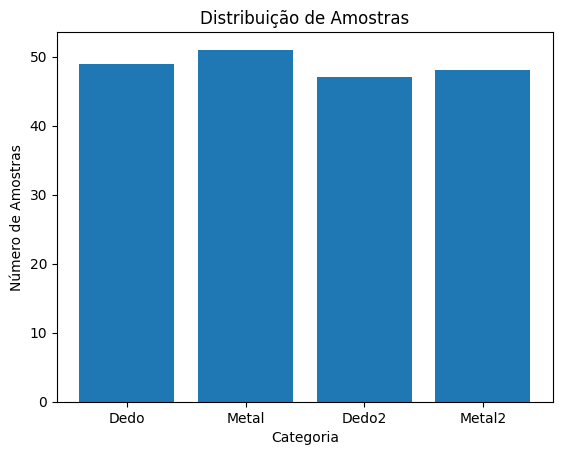

In [49]:
print("Amostras de dedo1:", len(amostras_dedo))
print("Amostras de metal1:", len(amostras_metal))
print("Amostras de dedo2:", len(amostras_dedo2))
print("Amostras de metal2:", len(amostras_metal2))
print()
print("Tamanho de X:", X.shape)
print("Tamanho de y:", y.shape)


# Contar quantas amostras são de dedo e quantas são de metal
num_amostras_dedo = len(amostras_dedo)
num_amostras_metal = len(amostras_metal)
num_amostras_dedo2 = len(amostras_dedo2)
num_amostras_metal2 = len(amostras_metal2)

# Criar um gráfico de barras
categorias = ['Dedo', 'Metal', 'Dedo2', 'Metal2']
num_amostras = [num_amostras_dedo, num_amostras_metal, num_amostras_dedo2, num_amostras_metal2]

plt.bar(categorias, num_amostras)
plt.xlabel('Categoria')
plt.ylabel('Número de Amostras')
plt.title('Distribuição de Amostras')

# Mostrar o gráfico
plt.show()


# Explicação Keras

No Keras, ao criar um modelo de classificação, você precisa definir a função de perda (loss) e a métrica que será otimizada durante o treinamento. Além disso, ao compilar o modelo, você especifica o otimizador que será usado. Aqui estão alguns pontos-chave:

Função de Perda (Loss Function): A função de perda define como a diferença entre as previsões do modelo e os rótulos reais é calculada. Para problemas de classificação binária, a "binary_crossentropy" é comumente usada. Para problemas de classificação multiclasse, a "categorical_crossentropy" é uma escolha típica.

Métrica de Avaliação: A métrica de avaliação é usada para monitorar o desempenho do modelo durante o treinamento, mas não é usada no processo de otimização. Para problemas de classificação, a "accuracy" (acurácia) é uma métrica comum.

Otimizador: O otimizador é responsável por ajustar os pesos do modelo com base na função de perda. O "Adam" é um otimizador popular, mas existem várias opções, como "SGD" (Gradiente Descendente Estocástico) e outros.

Ao compilar o modelo, você pode especificar esses elementos. Aqui está um exemplo para um problema de classificação binária:

python
Copy code
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

# Criando o modelo

model = Sequential()
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compilando o modelo

model.compile(loss='binary_crossentropy', optimizer=Adam(), metrics=['accuracy'])
No exemplo acima, loss='binary_crossentropy' é a função de perda para um problema de classificação binária, optimizer=Adam() é o otimizador Adam, e metrics=['accuracy'] especifica que a acurácia será monitorada durante o treinamento.

Lembrando que, ao treinar o modelo com model.fit(), você passa os rótulos reais (y_train) como argumento e o modelo irá automaticamente inferir a função de perda apropriada com base no formato desses rótulos.








In [50]:
resultados = []
n = 50

for k in range(n):

    # Em vez de usar o train_test_split do scikit-learn, dividir manualmente
    indices = np.random.permutation(len(X))
    split_point = int(0.8 * len(X))
    X_train, X_test = X[indices[:split_point]], X[indices[split_point:]]
    y_train, y_test = yenc[indices[:split_point]], yenc[indices[split_point:]]

    # Criar e treinar um modelo de classificação usando Keras/TensorFlow
    model = Sequential()
    model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
    model.add(Dense(1, activation='sigmoid'))

    # Compilar o modelo
    model.compile(loss='binary_crossentropy', optimizer=Adam(), metrics=['accuracy'])

    # Treinar o modelo
    model.fit(X_train, y_train, epochs=10, batch_size=32, verbose=0)

    # Avaliar o modelo no conjunto de teste
    _, accuracy = model.evaluate(X_test, y_test, verbose=0)
    print(f'Acurácia do modelo: {accuracy:.2f}')
    resultados.append(accuracy)

print()
print()
print("Média", np.mean(resultados))
print("Variância", np.var(resultados))
print("Desvio padrão", np.std(resultados))




Acurácia do modelo: 0.95
Acurácia do modelo: 0.97
Acurácia do modelo: 0.90
Acurácia do modelo: 0.97
Acurácia do modelo: 0.92
Acurácia do modelo: 0.92
Acurácia do modelo: 0.92
Acurácia do modelo: 0.92
Acurácia do modelo: 0.95
Acurácia do modelo: 0.92
Acurácia do modelo: 0.95
Acurácia do modelo: 0.92
Acurácia do modelo: 0.97
Acurácia do modelo: 0.95
Acurácia do modelo: 0.97
Acurácia do modelo: 0.95
Acurácia do modelo: 0.90
Acurácia do modelo: 0.97
Acurácia do modelo: 0.97
Acurácia do modelo: 0.95
Acurácia do modelo: 0.92
Acurácia do modelo: 1.00
Acurácia do modelo: 0.95
Acurácia do modelo: 1.00
Acurácia do modelo: 0.97
Acurácia do modelo: 0.90
Acurácia do modelo: 0.90
Acurácia do modelo: 0.97
Acurácia do modelo: 0.92
Acurácia do modelo: 0.95
Acurácia do modelo: 1.00
Acurácia do modelo: 0.95
Acurácia do modelo: 0.95
Acurácia do modelo: 0.95
Acurácia do modelo: 1.00
Acurácia do modelo: 0.95
Acurácia do modelo: 0.95
Acurácia do modelo: 0.92
Acurácia do modelo: 0.90
Acurácia do modelo: 0.

In [51]:
# Treinar o modelo
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

# Obter as acurácias do treinamento e validação de cada época
train_accuracies = history.history['accuracy']
val_accuracies = history.history['val_accuracy']

# Calcular a média das acurácias do treinamento e validação
avg_train_accuracy = np.mean(train_accuracies)
avg_val_accuracy = np.mean(val_accuracies)
print()
print()
# Imprimir a média das acurácias
print(f'Média da Acurácia do Treinamento: {avg_train_accuracy:.2f}')
print(f'Média da Acurácia da Validação: {avg_val_accuracy:.2f}')
print()
print()
# Avaliar o modelo no conjunto de teste
_, accuracy = model.evaluate(X_test, y_test)
print()
print()
print(f'Acurácia do modelo no conjunto de teste: {accuracy:.2f}')
print()
print()
# Fazer previsões no conjunto de teste
y_pred_probs = model.predict(X_test)
y_pred = (y_pred_probs > 0.5).astype(int)



Epoch 1/10
5/5 [==============================] - 0s 17ms/step - loss: 0.0732 - accuracy: 0.9872 - val_loss: 0.2540 - val_accuracy: 0.8718
Epoch 2/10
5/5 [==============================] - 0s 8ms/step - loss: 0.0666 - accuracy: 0.9872 - val_loss: 0.2487 - val_accuracy: 0.8718
Epoch 3/10
5/5 [==============================] - 0s 9ms/step - loss: 0.0610 - accuracy: 0.9936 - val_loss: 0.2434 - val_accuracy: 0.8974
Epoch 4/10
5/5 [==============================] - 0s 8ms/step - loss: 0.0564 - accuracy: 0.9936 - val_loss: 0.2384 - val_accuracy: 0.8974
Epoch 5/10
5/5 [==============================] - 0s 9ms/step - loss: 0.0519 - accuracy: 0.9936 - val_loss: 0.2353 - val_accuracy: 0.8974
Epoch 6/10
5/5 [==============================] - 0s 8ms/step - loss: 0.0482 - accuracy: 1.0000 - val_loss: 0.2312 - val_accuracy: 0.8974
Epoch 7/10
5/5 [==============================] - 0s 8ms/step - loss: 0.0445 - accuracy: 1.0000 - val_loss: 0.2263 - val_accuracy: 0.8974
Epoch 8/10
5/5 [=================